# Linear Regression

# Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split /
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [41]:
house= pd.read_csv("C:\\Users\\USER\\Downloads\\kc_house_data (1).csv")

In [42]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [43]:
#Checking for missing values
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
#Checking for a uniqu value in grade colomn
house['waterfront'].nunique()

2

In [45]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
rel_ft=house[['bedrooms', 'bathrooms', 'condition','yr_renovated','grade','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','yr_built','view','floors','lat','sqft_above','waterfront','sqft_living15','price']]
rel_ft

,bedrooms,bathrooms,condition,yr_renovated,grade,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,view,floors,lat,sqft_above,waterfront,sqft_living15,price
0,3,1.00,3,0,7,3,1.00,1180,5650,1955,0,1.0,47.5112,1180,0,1340,221900.0
1,3,2.25,3,1991,7,3,2.25,2570,7242,1951,0,2.0,47.7210,2170,0,1690,538000.0
2,2,1.00,3,0,6,2,1.00,770,10000,1933,0,1.0,47.7379,770,0,2720,180000.0
3,4,3.00,5,0,7,4,3.00,1960,5000,1965,0,1.0,47.5208,1050,0,1360,604000.0
4,3,2.00,3,0,8,3,2.00,1680,8080,1987,0,1.0,47.6168,1680,0,1800,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3,0,8,3,2.50,1530,1131,2009,0,3.0,47.6993,1530,0,1530,360000.0
21609,4,2.50,3,0,8,4,2.50,2310,5813,2014,0,2.0,47.5107,2310,0,1830,400000.0
21610,2,0.75,3,0,7,2,0.75,1020,1350,2009,0,2.0,47.5944,1020,0,1020,402101.0
21611,3,2.50,3,0,8,3,2.50,1600,2388,2004,0,2.0,47.5345,1600,0,1410,400000.0


In [47]:
rel_ft[['bedrooms','bathrooms','condition','yr_renovated','grade','price', 'bedrooms','sqft_living',
       'sqft_lot','yr_built','view','floors','sqft_above','waterfront','sqft_living15','price']].nunique()

bedrooms           13
bedrooms           13
bathrooms          30
bathrooms          30
condition           5
yr_renovated       70
grade              12
price            4028
bedrooms           13
bedrooms           13
sqft_living      1038
sqft_lot         9782
yr_built          116
view                5
floors              6
sqft_above        946
waterfront          2
sqft_living15     777
price            4028
dtype: int64

In [48]:
sc=StandardScaler()
trans=sc.fit_transform(rel_ft)

In [49]:
trans_df=pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.398737,-1.447464,-0.629187,-0.210128,-0.558836,-0.398737,-1.447464,-0.979835,-0.228321,-0.544898,-0.305759,-0.915427,-0.352572,-0.734708,-0.087173,-0.943355,-0.866717
1,-0.398737,0.175607,-0.629187,4.746678,-0.558836,-0.398737,0.175607,0.533634,-0.189885,-0.681079,-0.305759,0.936506,1.161568,0.460841,-0.087173,-0.432686,-0.005688
2,-1.473959,-1.447464,-0.629187,-0.210128,-1.409587,-1.473959,-1.447464,-1.426254,-0.123298,-1.293892,-0.305759,-0.915427,1.283537,-1.229834,-0.087173,1.070140,-0.980849
3,0.676485,1.149449,2.444294,-0.210128,-0.558836,0.676485,1.149449,-0.130550,-0.244014,-0.204446,-0.305759,-0.915427,-0.283288,-0.891699,-0.087173,-0.914174,0.174090
4,-0.398737,-0.149007,-0.629187,-0.210128,0.291916,-0.398737,-0.149007,-0.435422,-0.169653,0.544548,-0.305759,-0.915427,0.409550,-0.130895,-0.087173,-0.272190,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.629187,-0.210128,0.291916,-0.398737,0.500221,-0.598746,-0.337424,1.293542,-0.305759,2.788439,1.004958,-0.312039,-0.087173,-0.666135,-0.490545
21609,0.676485,0.500221,-0.629187,-0.210128,0.291916,0.676485,0.500221,0.250539,-0.224386,1.463768,-0.305759,0.936506,-0.356180,0.629908,-0.087173,-0.228419,-0.381588
21610,-1.473959,-1.772078,-0.629187,-0.210128,-0.558836,-1.473959,-1.772078,-1.154047,-0.332137,1.293542,-0.305759,0.936506,0.247888,-0.927928,-0.087173,-1.410253,-0.375865
21611,-0.398737,0.500221,-0.629187,-0.210128,0.291916,-0.398737,0.500221,-0.522528,-0.307076,1.123316,-0.305759,0.936506,-0.184414,-0.227505,-0.087173,-0.841221,-0.381588


In [50]:
x=trans_df.iloc[:, :-1]#index location for all the column except for the last column
y=trans_df.iloc[:, -1]#index location for the last column only

In [51]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.398737,-1.447464,-0.629187,-0.210128,-0.558836,-0.398737,-1.447464,-0.979835,-0.228321,-0.544898,-0.305759,-0.915427,-0.352572,-0.734708,-0.087173,-0.943355
1,-0.398737,0.175607,-0.629187,4.746678,-0.558836,-0.398737,0.175607,0.533634,-0.189885,-0.681079,-0.305759,0.936506,1.161568,0.460841,-0.087173,-0.432686
2,-1.473959,-1.447464,-0.629187,-0.210128,-1.409587,-1.473959,-1.447464,-1.426254,-0.123298,-1.293892,-0.305759,-0.915427,1.283537,-1.229834,-0.087173,1.070140
3,0.676485,1.149449,2.444294,-0.210128,-0.558836,0.676485,1.149449,-0.130550,-0.244014,-0.204446,-0.305759,-0.915427,-0.283288,-0.891699,-0.087173,-0.914174
4,-0.398737,-0.149007,-0.629187,-0.210128,0.291916,-0.398737,-0.149007,-0.435422,-0.169653,0.544548,-0.305759,-0.915427,0.409550,-0.130895,-0.087173,-0.272190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.629187,-0.210128,0.291916,-0.398737,0.500221,-0.598746,-0.337424,1.293542,-0.305759,2.788439,1.004958,-0.312039,-0.087173,-0.666135
21609,0.676485,0.500221,-0.629187,-0.210128,0.291916,0.676485,0.500221,0.250539,-0.224386,1.463768,-0.305759,0.936506,-0.356180,0.629908,-0.087173,-0.228419
21610,-1.473959,-1.772078,-0.629187,-0.210128,-0.558836,-1.473959,-1.772078,-1.154047,-0.332137,1.293542,-0.305759,0.936506,0.247888,-0.927928,-0.087173,-1.410253
21611,-0.398737,0.500221,-0.629187,-0.210128,0.291916,-0.398737,0.500221,-0.522528,-0.307076,1.123316,-0.305759,0.936506,-0.184414,-0.227505,-0.087173,-0.841221


In [52]:
y

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: 16, Length: 21613, dtype: float64

In [53]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.2)

In [54]:
# building our model - multiple linear regression model

linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

target=linear_model.predict(x_test)

In [55]:
target

array([-0.30232203, -0.01152828,  0.09900984, ...,  0.04628777,
        1.21407964,  0.36223071])

In [56]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.26695735191307995
0.7157401290710255


Simple Linear Regression Section

In [57]:
x_sqft=trans_df.iloc[:, 15]# 
y_sqft=trans_df.iloc[:, -1]

In [58]:
x_train, x_test, y_train, y_test=train_test_split(x_sqft,y_sqft, test_size=.2)

In [59]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)

In [60]:
# Building our model - Simple linear regression model btw sqft_living15 and price
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

target=linear_model.predict(x_test)

In [61]:
print('MSE: ', mean_squared_error(y_test, target))
print('R squared: ', metrics.r2_score(y_test, target))

MSE:  0.6339056205589962
R squared:  0.3523831327634608


In [62]:
x_sqft=trans_df.iloc[:, 8]
y_sqft=trans_df.iloc[:, -1]

In [63]:
x_train_lot, x_test_lot, y_train_lot, y_test_lot=train_test_split(x_sqft,y_sqft, test_size=.2)

In [64]:
x_train_lot=np.array(x_train_lot).reshape(-1,1)
x_test_lot=np.array(x_test_lot).reshape(-1,1)

In [65]:
# Building our model - Simple linear regression model btw sqft_lot and price
linear_model=LinearRegression()
linear_model.fit(x_train_lot, y_train_lot)

target=linear_model.predict(x_test_lot)

In [66]:
print('MSE: ', mean_squared_error(y_test_lot, target))
print('R squared: ', metrics.r2_score(y_test_lot, target))

MSE:  0.9861604740049894
R squared:  0.009094098898336789


In [67]:
x_sqft=trans_df.iloc[:, 7]
y_sqft=trans_df.iloc[:, -1]

In [68]:
x_train_living, x_test_living, y_train_living, y_test_living=train_test_split(x_sqft,y_sqft, test_size=.2)

In [69]:
x_train_living=np.array(x_train_living).reshape(-1,1)
x_test_living=np.array(x_test_living).reshape(-1,1)

In [70]:
# Building our model - Simple linear regression model btw sqft_living and price
linear_model=LinearRegression()
linear_model.fit(x_train_living, y_train_living)

target=linear_model.predict(x_test_living)

In [71]:
print('MSE: ', mean_squared_error(y_test_living, target))
print('R squared: ', metrics.r2_score(y_test_living, target))

MSE:  0.45747682212160323
R squared:  0.46588716728241375


In [72]:
x_sqft=trans_df.iloc[:, 9]
y_sqft=trans_df.iloc[:, -1]

In [84]:
x_train_sqft, x_test_sqft, y_train_sqft, y_test_sqft = train_test_split(x_sqft,y_sqft, test_size=.2)

In [85]:
x_train_sqft = np.array(x_train_sqft).reshape(-1,1)
x_test_sqft = np.array(x_test_sqft).reshape(-1,1)

In [86]:
# Building our model - Simple linear regression model btw yr_built and price
linear_model=LinearRegression()
linear_model.fit(x_train_sqft, y_train_sqft)

target=linear_model.predict(x_test_sqft)

In [88]:
print('MSE: ', mean_squared_error(y_test_sqft, target))
print('R squared: ', metrics.r2_score(y_test_sqft, target))

MSE:  1.0535927685781636
R squared:  0.0038395587705573053


# Polynomial Regression

In [115]:
# initiate the polynomial object from the preprocessing library
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

In [116]:
x_poly =  poly.fit_transform(x_test_sqft)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_test_sqft)

LinearRegression()

In [123]:
print('Intercept constant for our linear model:', linear_model.intercept_)
print('coefficient  of x for our linear model:', linear_model.coef_)

Intercept constant for our linear model: -0.0006437034800594292
coefficient  of x for our linear model: [0.05121321]


In [124]:
y_predict = linear_model.predict(x_test_sqft)

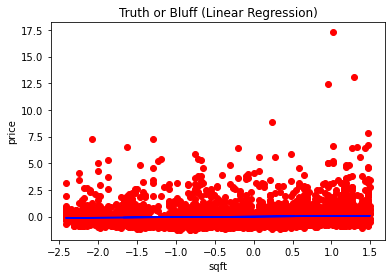

In [125]:
plt.scatter(x_test_sqft,y_test_sqft,color = 'red')
plt.plot(x_test_sqft,y_predict, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

In [126]:
y_pred_poly=lin_reg_2.predict(x_poly)

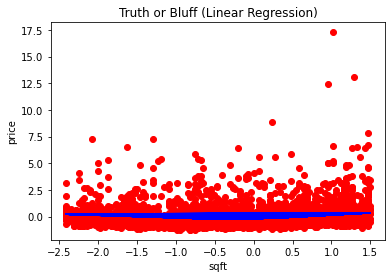

In [130]:
plt.scatter(x_test_sqft,y_test_sqft,color = 'red')
plt.plot(x_test_sqft,y_pred_poly, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()